В этой работе мы будем исследовать, как различные параметры сотрудников некоторой фирмы влияют на количество больничных дней. Для начала импортируем библиотеки:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Прежде чем переходить к проверке интересующих нас гипотез, считаем данные и приведем их к удобному виду.

In [2]:
workers_raw = pd.read_csv('М.Тех_Данные_к_ТЗ_DS.csv', encoding='pt154', sep=',')

In [40]:
# из-за того, что данные были предоставлены в странной кодировке,
# параметр sep не работает и нам нужно разбить данные вручную.

# разобьем полученную таблицу по запятым
data = workers_raw['Количество больничных дней,\"Возраст\",\"Пол\"'].str.split(',')
# объединим полученные списки в один
data = np.vstack(data.to_numpy())

# создадим датафрейм, с которым будем работать дальше
workers =  pd.DataFrame()
workers['work_days'] = data[:, 0]
workers['age'] = data[:, 1]
workers['sex'] = data[:, 2]

workers['sex'] = workers['sex'].str.replace('\"Ж\"', 'f')
workers['sex'] = workers['sex'].str.replace('\"М\"', 'm')

# приведем численные параметры к численному типу данных
workers['work_days'] = pd.to_numeric(workers['work_days'])
workers['age'] = pd.to_numeric(workers['age'])

In [41]:
workers.describe()

,work_days,age
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


**Гипотеза 1**: мужчины берут больше двух больничных дней значительно чаще женщин. Для проверки этой гипотезы визуализируем данные и проведем статистические расчеты.

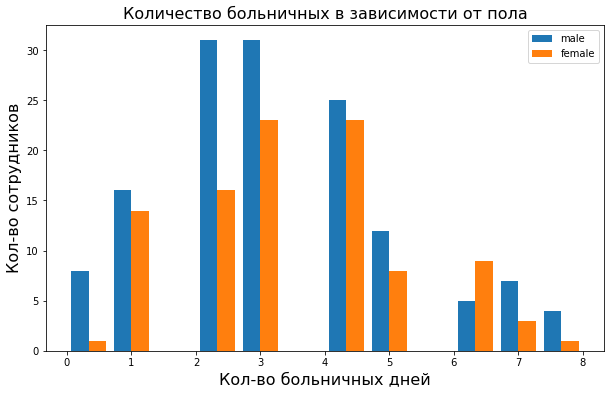

In [147]:
x1 = list(workers[workers['sex'] == 'm']['work_days'])
x2 = list(workers[workers['sex'] == 'f']['work_days'])

plt.figure(figsize=(10,6))

names = ['male', 'female']
plt.hist([x1, x2], bins = int(37/3), label=names)

plt.xlabel("Кол-во больничных дней", fontsize=16)
plt.ylabel("Кол-во сотрудников", fontsize=16)
plt.title("Количество больничных в зависимости от пола", fontsize=16)

plt.legend()

Может сложиться впечатление, что работники-мужчины чаще берут больничные. Однако по гистограмме видно, что это происходит из-за того, что работников-мужчин больше, чем работников женщин, и что для того, чтобы выяснить, кто чаще берет больничные, нужно провести более детальные исследования.

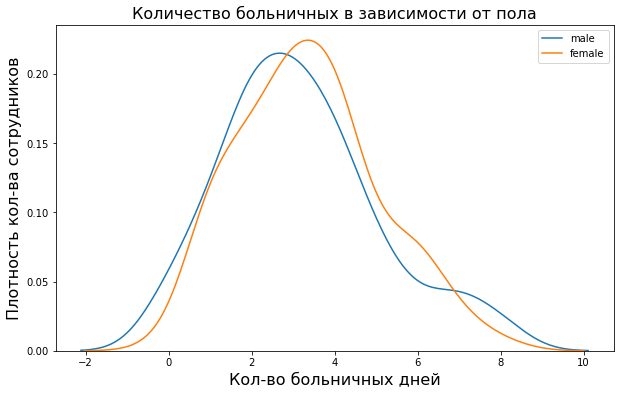

In [156]:
x1 = list(workers[workers['sex'] == 'm']['work_days'])
x2 = list(workers[workers['sex'] == 'f']['work_days'])

plt.figure(figsize=(10,6))

sns.kdeplot(x1, label='male')
sns.kdeplot(x2, label='female')

plt.xlabel("Кол-во больничных дней", fontsize=16)
plt.ylabel("Плотность кол-ва сотрудников", fontsize=16)
plt.title("Количество больничных в зависимости от пола", fontsize=16)

plt.legend()

По графику распределений видим, что количество больничных дней у женщин в среднем оказывается даже больше, чем у мужчин, что противоречит гипотезе 1.

Далее мы с помощью t-теста проверим, является ли верной следующая нуль-гипотеза: среднее значение в выборке с мужчинами и в выборке с женщинами одинаковое. Чтобы воспользоваться t-тестом, мы должны выяснить, соответствует ли выборка нормальному распределению и совпадают ли дисперсии у нужных нам подвыборок. Уровень значимости будем считать равным 0.05.

In [14]:
stats.levene(x1, x2)

LeveneResult(statistic=0.45280300885647573, pvalue=0.5016680083552109)

С помощью критерия Левене определили, что дисперсии у выборок примерно одинаковые.

Чтобы проверить, соответствуют ли наши выборки нормальному распределению, воспользуемся критереем шапиро. Применим его к списку, в котором хранятся средние значения случайных подвыборок наших выборок, чтобы убедиться, что среднее значение распределено нормально.

In [82]:
means_m = []
n = 1

while n < 500:
    n += 1
    sample = workers[workers['sex'] == "m"].sample(75)['work_days'].mean()
    means_m.append(sample)

In [83]:
stats.shapiro(means_m)

ShapiroResult(statistic=0.9969392418861389, pvalue=0.4737672507762909)

In [87]:
means_f = []
n = 1

while n < 500:
    n += 1
    sample = workers[workers['sex'] == "f"].sample(75)['work_days'].mean()
    means_f.append(sample)

In [88]:
stats.shapiro(means_f)

ShapiroResult(statistic=0.9951432347297668, pvalue=0.1198783665895462)

По результату теста видим, что выборки соответствуют нормальному распределению.

In [53]:
stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-0.7856303350416829, pvalue=0.4328754720595044)

Как видим, t-тест показывает, что среднее значение у обеих выборок не отличается. Это подтверждает промежуточную нуль-гипотезу и опровергает гипотезу 1.

**Вывод:** с помощью двух различных способов (графического и аналитического) мы опровергли гипотезу о том, что мужчины в среднем берут на 2 больничных дня больше, значит, она неверна.

**Гипотеза 2**: сотрудники старше 35 лет берут больше двух больничных дней значительно чаще своих более молодых коллег. Для проверки этой гипотезы визуализируем данные и проведем статистические расчеты.

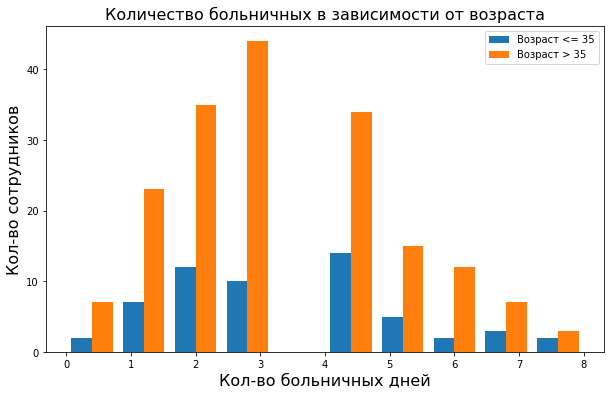

In [152]:
x1 = list(workers[workers['age']<=35]['work_days'])
x2 = list(workers[workers['age']>35]['work_days'])

names = ['Возраст <= 35', 'Возраст > 35']

plt.figure(figsize=(10,6))

plt.hist([x1, x2], label=names)

plt.xlabel("Кол-во больничных дней", fontsize=16)
plt.ylabel("Кол-во сотрудников", fontsize=16)
plt.title("Количество больничных в зависимости от возраста", fontsize=16)

plt.legend()

По столбчатым диаграммам видим, что молодых работников значительно меньше, чем зрелых.

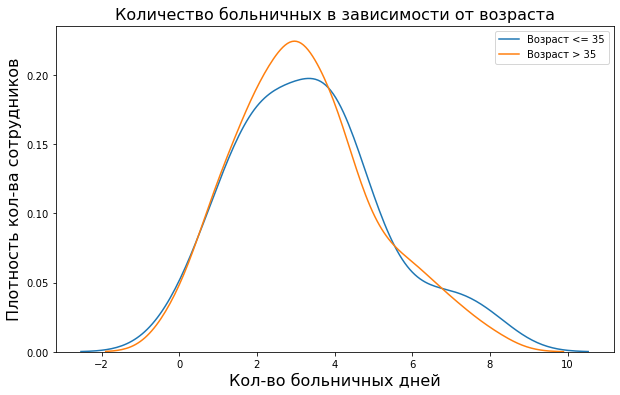

In [154]:
x1 = list(workers[workers['age']<=35]['work_days'])
x2 = list(workers[workers['age']>35]['work_days'])

plt.figure(figsize=(10,6))

sns.kdeplot(x1, label='Возраст <= 35')
sns.kdeplot(x2, label='Возраст > 35')

plt.xlabel("Кол-во больничных дней", fontsize=16)
plt.ylabel("Плотность кол-ва сотрудников", fontsize=16)
plt.title("Количество больничных в зависимости от возраста", fontsize=16)

plt.legend()

По графику распределений видим, что количество больничных дней в среднем у молодых и зрелых сотрудников примерно одинаково, что противоречит гипотезе 2.

Далее мы с помощью t-теста проверим, является ли верной следующая нуль-гипотеза: среднее значение в выборке с молодыми с зрелыми сотрудниками одинаковое. Чтобы воспользоваться t-тестом, мы должны выяснить, соответствует ли выборка нормальному распределению и совпадают ли дисперсии у нужных нам подвыборок. Уровень значимости будем считать равным 0.05.

In [37]:
stats.levene(x1, x2)

LeveneResult(statistic=0.3909909669234679, pvalue=0.532385693058304)

С помощью критерия Левене определили, что дисперсии у выборок примерно одинаковые.

Чтобы проверить, соответствуют ли наши выборки нормальному распределению, воспользуемся критереем шапиро. Применим его к списку, в котором хранятся средние значения случайных подвыборок наших выборок, чтобы убедиться, что среднее значение распределено нормально.

In [39]:
stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=0.447262667369775, pvalue=0.6550973822138465)

Чтобы проверить, соответствуют ли наши выборки нормальному распределению, воспользуемся критереем шапиро. Применим его к списку, в котором хранятся средние значения случайных подвыборок наших выборок, чтобы убедиться, что среднее значение распределено нормально.

In [133]:
means_y = []
n = 1

while n < 500:
    n += 1
    sample = workers[workers['age'] <= 35].sample(40)['work_days'].mean()
    means_y.append(sample)

In [134]:
stats.shapiro(means_y)

ShapiroResult(statistic=0.9960407018661499, pvalue=0.24682429432868958)

In [135]:
means_o = []
n = 1

while n < 500:
    n += 1
    sample = workers[workers['age'] > 35].sample(75)['work_days'].mean()
    means_o.append(sample)

In [136]:
stats.shapiro(means_o)

ShapiroResult(statistic=0.9947090744972229, pvalue=0.08357886224985123)

По результату теста видим, что выборки соответствуют нормальному распределению.

In [138]:
stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=0.447262667369775, pvalue=0.6550973822138465)


Как видим, t-тест показывает, что среднее значение у обеих выборок не отличается. Это подтверждает промежуточную нуль-гипотезу и опровергает гипотезу 2.

**Вывод:** с помощью двух различных способов (графического и аналитического) мы опровергли гипотезу о том, что сотрудники старше 35 лет в среднем берут на 2 больничных дня больше, значит, она неверна.